# <h1 align="center"> © RsydMathTech. <h1/>

# Polynomial Regression

## 1. Konsep
Regresi Polinomial adalah **kasus khusus dari regresi linear** yang digunakan ketika data **tidak linear terhadap fitur**, tapi tetap **linear terhadap parameter** $\beta$.

- Transformasi fitur menjadi **pangkat-pangkat polinomial**: $x, x^2, x^3, \dots$  
- Model bisa **kuadrat (quadratic), kubik (cubic), atau derajat lebih tinggi**  
- Cocok untuk **curvilinear relationships** (data berbentuk lengkung)

---

## 2. Model Matematika
Regresi linear biasa:
$$
y = \beta_0 + \beta_1 x + \epsilon
$$

Regresi polinomial (derajat 2 = kuadrat):
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon
$$

Regresi polinomial (derajat 3 = kubik):
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \epsilon
$$

Regresi polinomial multi-fitur (dua fitur, derajat 2):
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_1 x_2 + \beta_5 x_2^2 + \epsilon
$$

---

## 3. Kenapa Pakai Regresi Polinomial
- Regresi linear mungkin **tidak fit untuk data lengkung**  
- Regresi polinomial bisa **fit kurva dengan lebih akurat**  
- Derajat polinomial (**degree**) menentukan **fleksibilitas kurva**  
- Hati-hati: derajat terlalu tinggi → **overfitting**

---

## 4. Langkah Implementasi
1. Pilih derajat polinomial  
2. Transform fitur: $x \rightarrow x, x^2, x^3, \dots$  
3. Fit **LinearRegression** pada fitur polinomial  
4. Evaluasi dengan plot **kurva vs data asli**

---

## 5. Normalisasi / Scaling (Opsional)
- Untuk data multi-fitur, gunakan `StandardScaler` untuk **menormalisasi fitur**  
- Bisa digabungkan dalam **pipeline** agar otomatis

---

## 6. Pipeline
Pipeline memungkinkan menjalankan beberapa langkah berurutan:

1. **Normalisasi** → `StandardScaler`  
2. **Transformasi Polinomial** → `PolynomialFeatures`  
3. **Regresi Linear** → `LinearRegression`

```text
Pipeline: StandardScaler -> PolynomialFeatures -> LinearRegression


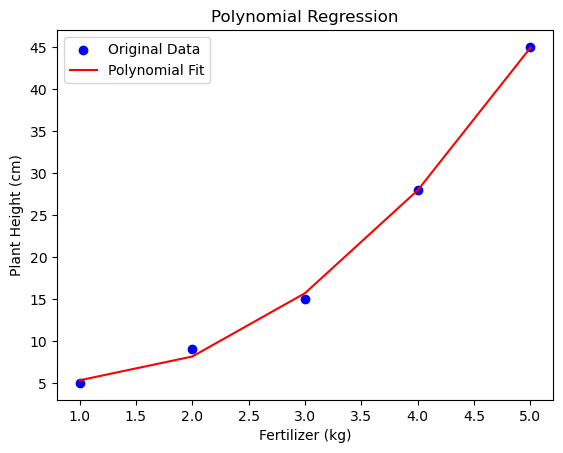

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data
fertilizer = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Feature: Fertilizer (kg)
height = np.array([5, 9, 15, 28, 45])                  # Target: Plant height (cm)

# Transform feature to polynomial (degree 2)
poly = PolynomialFeatures(degree=2)
fertilizer_poly = poly.fit_transform(fertilizer)

# Fit linear regression on polynomial features
model = LinearRegression()
model.fit(fertilizer_poly, height)

# Predict
height_pred = model.predict(fertilizer_poly)

# Plot
plt.scatter(fertilizer, height, color='blue', label='Original Data')
plt.plot(fertilizer, height_pred, color='red', label='Polynomial Fit')
plt.xlabel('Fertilizer (kg)')
plt.ylabel('Plant Height (cm)')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


In [4]:
# Polynomial Regression using Pipeline

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data
fertilizer = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
height = np.array([5, 9, 15, 28, 45])

# Pipeline: Scale -> Polynomial Transform -> Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Normalize features
    ('poly', PolynomialFeatures(degree=2)),  # Polynomial transform
    ('model', LinearRegression())            # Linear regression
])

# Fit pipeline
pipeline.fit(fertilizer, height)

# Predict
height_pred_pipeline = pipeline.predict(fertilizer)
print("Predicted plant heights (Pipeline):", height_pred_pipeline)


Predicted plant heights (Pipeline): [ 5.31428571  8.14285714 15.68571429 27.94285714 44.91428571]


PolynomialFeatures(degree=2) → quadratic fit

Pipeline automatically scales → transforms → predicts

Change degree for cubic (3) or higher-order curves